# Text Generation

- Deep-learning Language model
- Generative model
- Based on Chp 8 Deep Learning with Python

In [1]:
import keras
import numpy as np

In [2]:
## Download texts
path = '../data/t8.shakespeare.txt'
text = open(path).read().lower()
print('Corpus Length:', len(text))

Corpus Length: 5458199


In [3]:
## Creating sequences for training
maxlen = 60 # 60 characters as one sequence at a time
step = 3 # sample new sequence every 3 characters, shift size
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen]) # context
    next_chars.append(text[i + maxlen]) # target word
print('Number of sequences:', len(sentences))

Number of sequences: 1819380


In [4]:
## Creating char mapping dictionary
chars = sorted(list(set(text))) # dict of chars
print('Unique characters:', len(chars))
# create a map of each character and its corresponding numeric index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Unique characters: 65


In [5]:
## Vectorizing sequences
print('Vectorization...')
## one-hot encoding for all characters
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]]=1 # i-th sentence, t-th character, one-hot position
    y[i, char_indices[next_chars[i]]]=1 # i-th sentence, the target word one-hot position

Vectorization...


In [8]:
## Building Network
from keras import layers
model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

## Model configuration
optimizer = keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [9]:
## After the training, a function to sample the next char given the model prediction
def sample(preds, temperature = 1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)/temperature
    exp_preds = np.exp(preds)
    preds = exp_preds/np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [10]:
## Model Training
history = model.fit(x, y, batch_size=128, epochs = 10)


Epoch 1/10
 6360/14214 [============>.................] - ETA: 11:48 - loss: 2.0408

KeyboardInterrupt: 

In [24]:
## Save model
model.save('../data/text-gen-lstm-shakespear.h5')

In [25]:
print(history.history.keys())
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

dict_keys(['loss'])


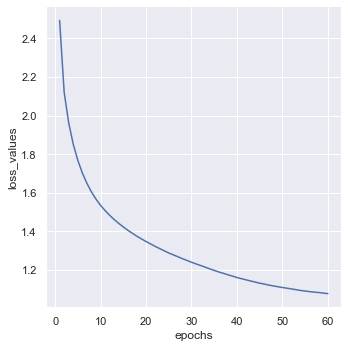

In [26]:
import seaborn as sns
import pandas as pd
%matplotlib inline

hist_df=pd.DataFrame(list(zip(epochs, loss_values)), columns=['epochs','loss_values'])
sns.set(style='darkgrid')
sns.relplot(data=hist_df,x='epochs', y='loss_values', kind='line')

In [27]:
## Generating Texts

import random
import sys


start_index = random.randint(0, len(text)-maxlen-1)
generated_text = text[start_index:start_index+maxlen]

In [29]:
print('--Generating with seed: "'+ generated_text + '"')
for temperature in [0.2, 0.5, 1.0, 1.2]:
    print('----- temperature:', temperature)
    sys.stdout.write(generated_text)
    # generate 400 chars after the seed text
    for i in range(200):
        # one-hot encoding seed text
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]]=1 # given the sample text, t-th char, one-hot position
        
        preds = model.predict(sampled, verbose=0)[0] # get output prob distribution
        next_index = sample(preds, temperature) # choose the char based on temperature
        next_char = chars[next_index]
        
        generated_text += next_char # append the new char
        generated_text = generated_text[1:] # get rid of the first char
        sys.stdout.write(next_char)
    

--Generating with seed: "t is laden. it is
believed that the more profound externed.-"
----- temperature: 0.2
t is laden. it is
believed that the more profound externed.--but it is the bast
to divine for a religious conscience of the moral problem of soul, and the trasidity and the
free spirit and the distimst of any say spirit as the bard in the freenses to
renused t----- temperature: 0.5
t of any say spirit as the bard in the freenses to
renused to remain and dearing the same tors of the such a profound
from the entire mone.n in the experience that man be inceres the
sight of propertan a doubl of the enolyoring in a mystictified man: it is the----- temperature: 1.0
n a doubl of the enolyoring in a mystictified man: it is the find" upon
the most instincts, from a lort and makes we now ach as are of
the noblesto inscreation as generaies of every uncommence man
and privilegen a goos
imaginaten, when other are laugh manner, ----- temperature: 1.2
 privilegen a goos
imaginaten, when other